# Load some modules

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns

# Prepare and explore the data sets

Load the CSV files into Pandas data frames

In [3]:
codebook = pd.read_csv("ExposomeChallengeData/datasets/codebook.csv", index_col=0)
phenotype = pd.read_csv("ExposomeChallengeData/datasets/phenotype.csv", index_col=0)
exposome = pd.read_csv("ExposomeChallengeData/datasets/exposome.csv", index_col=0)
covariates = pd.read_csv("ExposomeChallengeData/datasets/covariates.csv", index_col=0)

metabol_serum_exprs = pd.read_csv("ExposomeChallengeData/datasets/metabol_serum_exprs.csv", index_col=0).T
metabol_serum_pdata = pd.read_csv("ExposomeChallengeData/datasets/metabol_serum_pData.csv", index_col=0)
metabol_serum_fdata = pd.read_csv("ExposomeChallengeData/datasets/metabol_serum_fData.csv", index_col=0)

metabol_urine_exprs = pd.read_csv("ExposomeChallengeData/datasets/metabol_urine_exprs.csv", index_col=0).T
metabol_urine_pdata = pd.read_csv("ExposomeChallengeData/datasets/metabol_urine_pData.csv", index_col=0)
metabol_urine_fdata = pd.read_csv("ExposomeChallengeData/datasets/metabol_urine_fData.csv", index_col=0)

proteome_exprs = pd.read_csv("ExposomeChallengeData/datasets/proteome_exprs.csv", index_col=0).T
proteome_pdata = pd.read_csv("ExposomeChallengeData/datasets/proteome_pData.csv", index_col=0)
proteome_fdata = pd.read_csv("ExposomeChallengeData/datasets/proteome_fData.csv", index_col=0)

## Metabolomics expressions

Join all the metabolomic data in one data frame

In [4]:
metabol_exprs = pd.concat([metabol_serum_exprs.rename('serum_{}'.format, axis=1),
                           metabol_urine_exprs.rename('urine_{}'.format, axis=1)], axis=1)
metabol_exprs.head()

,serum_metab_1,serum_metab_2,serum_metab_3,serum_metab_4,serum_metab_5,serum_metab_6,serum_metab_7,serum_metab_8,serum_metab_9,serum_metab_10,...,urine_metab_35,urine_metab_36,urine_metab_37,urine_metab_38,urine_metab_39,urine_metab_40,urine_metab_41,urine_metab_42,urine_metab_43,urine_metab_44
430,-2.145605,-0.714302,8.599913,0.552377,7.051481,5.785289,3.747387,5.070389,-1.867752,-2.771027,...,5.185867,5.057450,12.117805,2.906891,4.446256,4.529821,3.877744,-0.152003,3.087463,2.459432
1187,-0.685014,-0.368663,9.154818,-1.334607,6.894211,5.806066,4.257765,5.083213,-2.300448,-3.418890,...,4.977280,7.870365,11.985735,-4.321928,4.990955,4.738768,-0.321928,0.263034,2.944858,2.584963
940,-0.685014,-0.361231,8.954196,-0.127368,7.104861,5.859224,4.345538,5.918863,-1.965784,-3.403542,...,4.986411,5.040016,12.200040,-4.321928,4.104337,4.385431,3.817623,-4.321928,3.744161,2.981853
936,-0.194295,-0.339163,8.535275,-0.618163,7.007308,5.950702,4.242603,5.405992,-1.894322,-2.841663,...,4.827819,6.697663,11.570899,-2.321928,4.765535,3.292782,3.017922,-4.321928,3.990955,3.523562
788,-1.960160,-0.346481,8.727920,-0.797112,6.895424,5.950702,4.884109,5.388878,-1.552156,-2.454032,...,4.754888,5.221104,11.679524,-0.321928,3.700440,4.781360,3.201634,-0.321928,2.765535,2.944858


Standarize data (min-max method)

In [5]:
columns, index = metabol_exprs.columns, metabol_exprs.index
metabol_exprs = pd.DataFrame(MinMaxScaler().fit_transform(metabol_exprs))
metabol_exprs.columns, metabol_exprs.index = columns, index
metabol_exprs.head()

,serum_metab_1,serum_metab_2,serum_metab_3,serum_metab_4,serum_metab_5,serum_metab_6,serum_metab_7,serum_metab_8,serum_metab_9,serum_metab_10,...,urine_metab_35,urine_metab_36,urine_metab_37,urine_metab_38,urine_metab_39,urine_metab_40,urine_metab_41,urine_metab_42,urine_metab_43,urine_metab_44
430,0.224542,0.205024,0.490470,0.653163,0.515652,0.483009,0.249523,0.340524,0.400406,0.574663,...,0.485001,0.628204,0.489431,0.640612,0.391376,0.665946,0.848047,0.360177,0.587031,0.605114
1187,0.402503,0.549489,0.828354,0.323912,0.431621,0.491824,0.376192,0.348330,0.213731,0.308797,...,0.469040,0.816605,0.441328,0.000000,0.494475,0.696170,0.413698,0.396026,0.572658,0.619732
940,0.402503,0.556896,0.706195,0.534558,0.544173,0.514375,0.397976,0.856991,0.358113,0.315096,...,0.469738,0.627037,0.519383,0.000000,0.326659,0.645060,0.841829,0.000000,0.653218,0.665950
936,0.462293,0.578889,0.451112,0.448921,0.492050,0.553183,0.372429,0.544806,0.388943,0.545676,...,0.457602,0.738061,0.290234,0.177238,0.451808,0.487007,0.759121,0.000000,0.678092,0.729031
788,0.247137,0.571595,0.568414,0.417697,0.432269,0.553183,0.531642,0.534388,0.536561,0.704749,...,0.452021,0.639165,0.329798,0.354477,0.250210,0.702331,0.778121,0.345500,0.554585,0.661642


In [6]:
print("Shape of the data set:", metabol_exprs.shape)
print("Number of data points:", np.multiply(*metabol_exprs.shape))

Shape of the data set: (1152, 221)
Number of data points: 254592


Write the data frame to a CSV file.

In [7]:
metabol_exprs.to_csv("ExposomeChallengeData/datasets/metabol_joint_exprs_minmax.csv")

## Phenotype data set

In [8]:
phenotype.head()

,ID,e3_bw,hs_asthma,hs_zbmi_who,hs_correct_raven,hs_Gen_Tot,hs_bmi_c_cat
1,1,4100,0,0.30,18,84.0,2
2,2,4158,0,0.41,25,39.0,2
3,3,4110,1,3.33,13,40.0,4
4,4,3270,0,-0.76,28,54.5,2
5,5,3950,0,0.98,19,18.0,2


In [9]:
codebook.loc[phenotype.columns[1:],["subfamily","description","var_type","labelsshort"]]

,subfamily,description,var_type,labelsshort
e3_bw,Outcome at birth,Child weight at birth (g),numeric,BW
hs_asthma,Outcome at 6-11 years old,Doctor diagnosed asthma (ever),factor,Asthma
hs_zbmi_who,Outcome at 6-11 years old,Body mass index z-score at 6-11 years old - WH...,numeric,zBMI
hs_correct_raven,Outcome at 6-11 years old,Intelligence quotient at 6-11 years old - Tota...,numeric,IQ
hs_Gen_Tot,Outcome at 6-11 years old,Neuro behavior - Internalizing and externalizi...,numeric,Behavior
hs_bmi_c_cat,Outcome at 6-11 years old,Body mass index categories at 6-11 years old -...,factor,BMI_cat


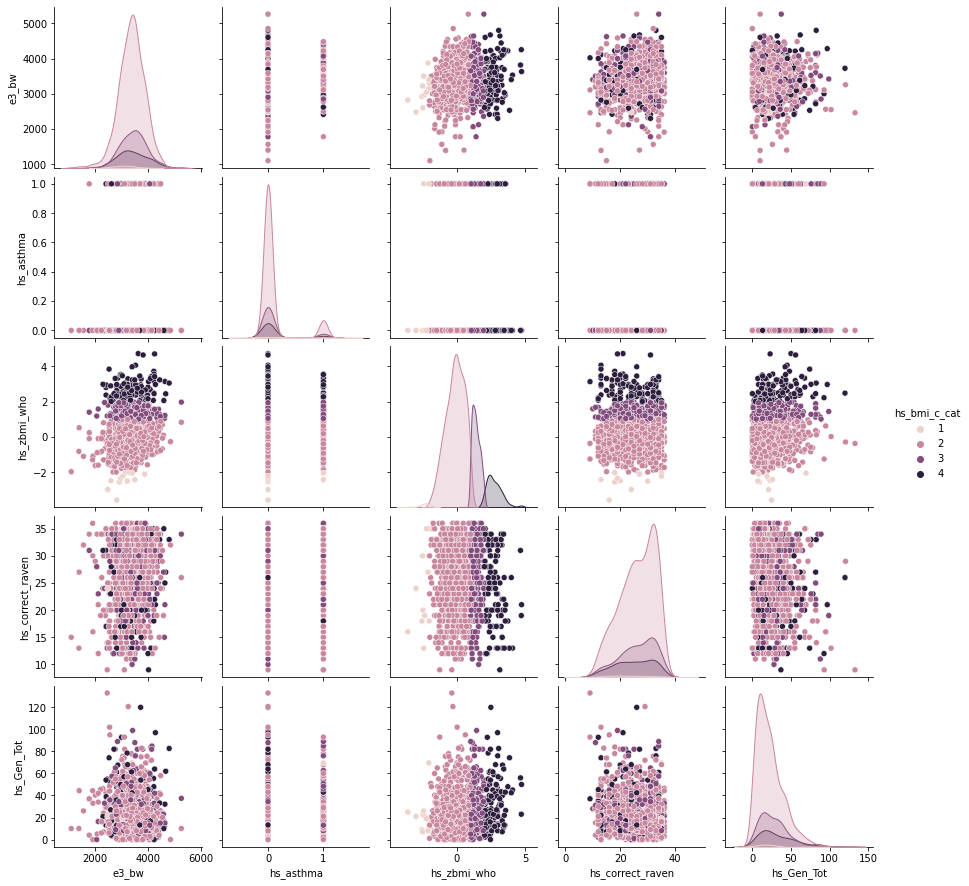

In [10]:
sns.pairplot(phenotype.iloc[:,1:], hue="hs_bmi_c_cat")

There doesn't seem to be any clear correlations (except the BMI indices and classes, which are redundant).

### Convert the numerical values to categorical

To compare the clusters with the numerical variables,
I'll first convert them to categorical.

Since there aren't any clear cut points to select,
I'll select an arbitrary number of 4 bins.
I'll partition the observations into equal sized groups using quantiles.

I'll codify all the groups as integers starting from 0.

In [11]:
birth_weight, bins = pd.qcut(phenotype.e3_bw, 4, labels=False, retbins=True)
print("Cut points:", bins)

Cut points: [1100. 3070. 3397. 3720. 5260.]


In [12]:
iq, bins = pd.qcut(phenotype.hs_correct_raven, 4, labels=False, retbins=True)
print("Cut points:", bins)

Cut points: [ 9. 21. 27. 32. 36.]


In [13]:
behaviour, bins = pd.qcut(phenotype.hs_Gen_Tot, 4, labels=False, retbins=True)
print("Cut points:", bins)

Cut points: [  0.        10.046875  20.1875    34.       133.      ]


In [14]:
phenotype_cat = pd.DataFrame({"birth_weight": birth_weight,
                              "iq": iq, 
                              "behaviour": behaviour, 
                              "asthma": phenotype.hs_asthma, 
                              "bmi": phenotype.hs_bmi_c_cat-1})

In [15]:
phenotype_cat.head()

,birth_weight,iq,behaviour,asthma,bmi
1,3,0,3,0,1
2,3,1,3,0,1
3,3,0,3,1,3
4,1,2,3,0,1
5,3,0,1,0,1


Write the data frame to a CSV file.

In [16]:
phenotype_cat.to_csv("ExposomeChallengeData/datasets/phenotype_cat.csv")

## Covariates data set

In [17]:
covariates.head()

,ID,h_cohort,e3_sex_None,e3_yearbir_None,h_mbmi_None,hs_wgtgain_None,e3_gac_None,h_age_None,h_edumc_None,h_native_None,h_parity_None,hs_child_age_None,hs_c_height_None,hs_c_weight_None
1,1,4,male,2008,25.510204,17.0,41.000000,28.000000,2,2,0,6.165640,1.220,23.4
2,2,4,male,2007,26.491508,18.0,41.000000,22.841553,3,2,1,6.992471,1.220,27.6
3,3,4,male,2008,30.116213,11.0,39.000000,34.232422,3,2,1,6.110883,1.280,37.5
4,4,2,female,2005,21.048048,21.0,39.285713,32.725529,1,2,1,10.138261,1.345,27.7
5,5,3,male,2005,22.151022,20.0,43.000000,20.865160,1,2,0,9.451175,1.370,34.0


In [18]:
codebook.loc[covariates.columns[1:],["subfamily","description","var_type","labelsshort"]]

,subfamily,description,var_type,labelsshort
h_cohort,Maternal covariate,Cohort of inclusion (1 to 6),factor,Cohort
e3_sex_None,Child covariate,Child sex (female / male),factor,Sex
e3_yearbir_None,Child covariate,Year of birth (2003 to 2009),factor,YearBirth
h_mbmi_None,Maternal covariate,Maternal pre-pregnancy body mass index (kg/m2),numeric,mBMI
hs_wgtgain_None,Maternal covariate,Maternal weight gain during pregnancy (kg),numeric,Weightgain
e3_gac_None,Child covariate,Gestational age at birth (week),numeric,GestAge
h_age_None,Maternal covariate,Maternal age (years),numeric,mAge
h_edumc_None,Maternal covariate,"Maternal education (1: primary school, 2:secon...",factor,mEducation
h_native_None,Child covariate,Are the parents native from the country of the...,factor,Native
h_parity_None,Maternal covariate,"Parity before index pregnancy (0: nulliparous,...",factor,Parity


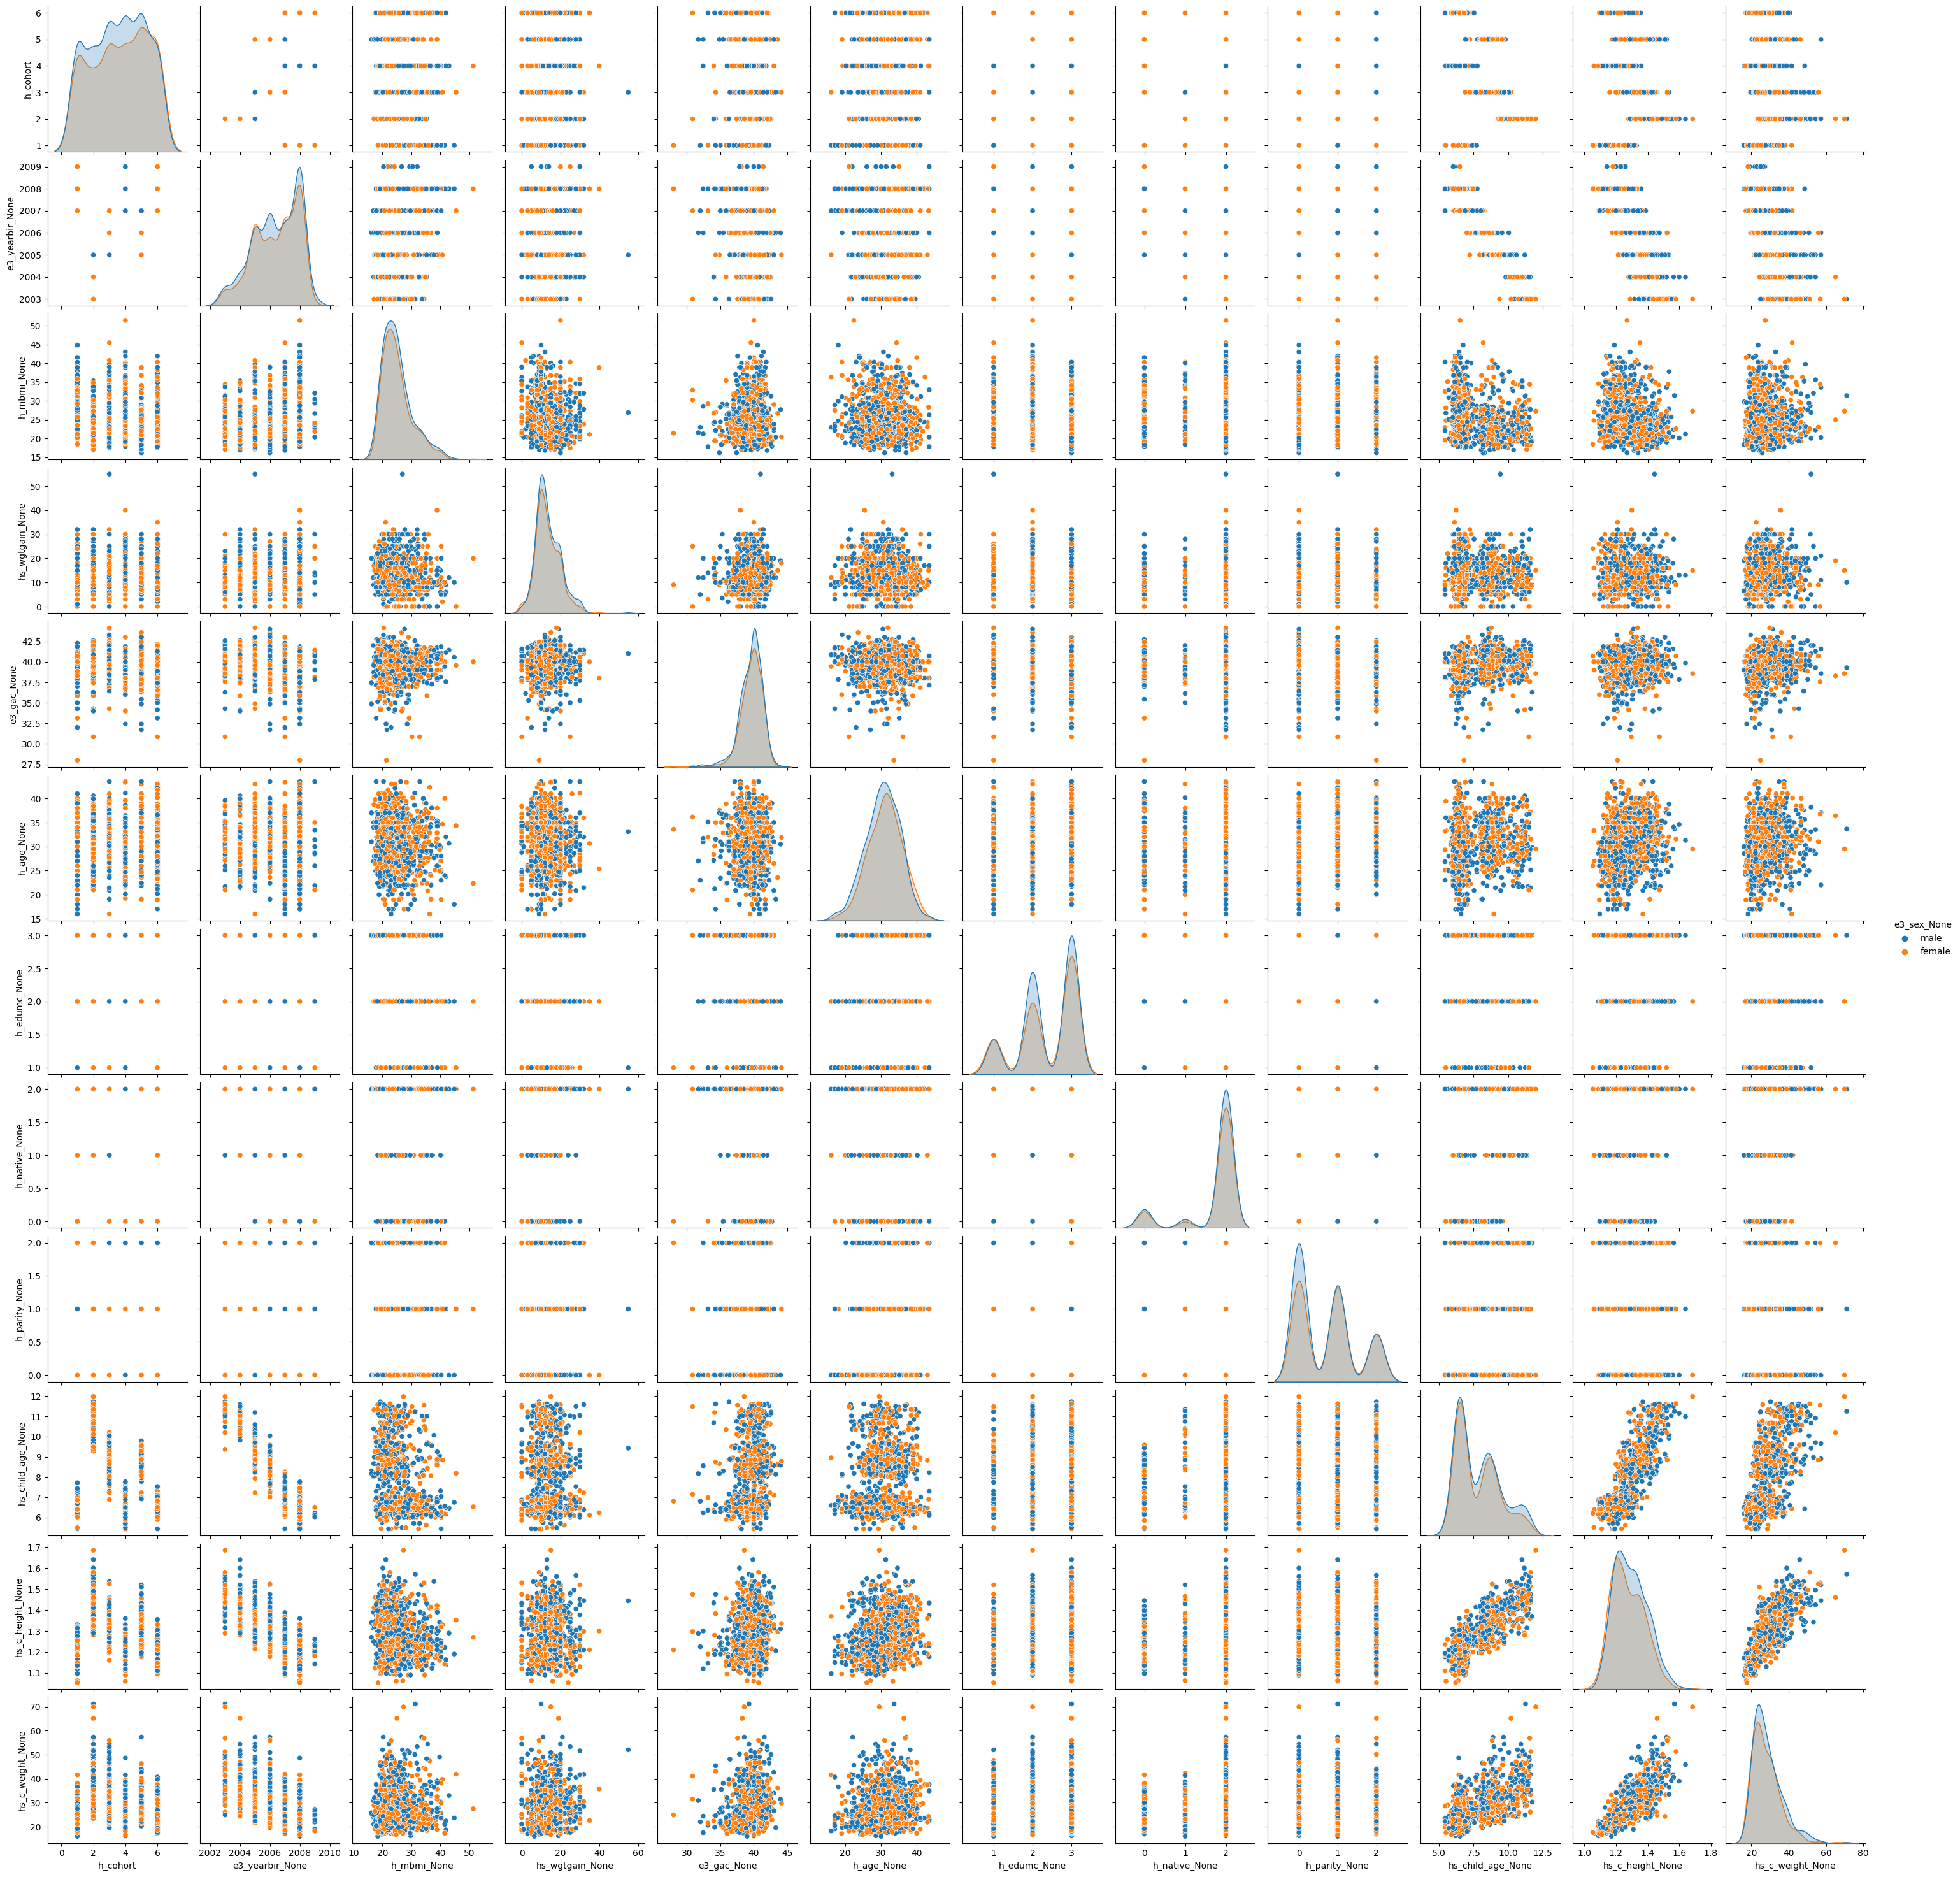

In [19]:
sns.pairplot(covariates.iloc[:,1:], hue="e3_sex_None")

There is some obvius correlation between year of birth, child age, heigth and weight.
It doesn't seem like there are any other strong correlations.

I'll select the following categorical variables, since they may be informative:

- h_cohort
- e3_yearbir_None
- e3_sex_None
- h_edumc_None
- h_native_None
- h_parity_None

I'll codify all of them as integers starting from 0.

In [20]:
sex = [0 if i == "male" else 1 for i in covariates.e3_sex_None.values]
age = (-1) * (covariates.e3_yearbir_None - 2009)
covariates_cat = pd.DataFrame({"cohort": covariates.h_cohort -1,
                              "age": age,
                              "sex": sex,
                              "education": covariates.h_edumc_None -1,
                              "native": covariates.h_native_None,
                              "parity": covariates.h_parity_None})
covariates_cat.head()

,cohort,age,sex,education,native,parity
1,3,1,0,1,2,0
2,3,2,0,2,2,1
3,3,1,0,2,2,1
4,1,4,1,0,2,1
5,2,4,0,0,2,0


In [21]:
covariates_cat.to_csv("ExposomeChallengeData/datasets/covariates_cat.csv")

## Joint Phenotype and Covariates

<AxesSubplot:>

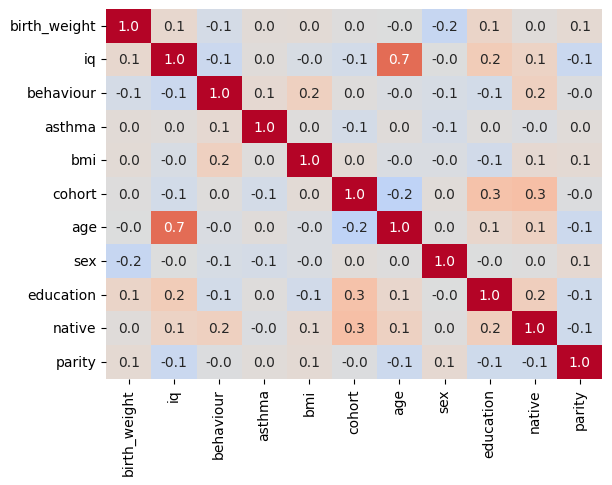

In [22]:
cat_data = pd.concat([phenotype_cat, covariates_cat], axis=1)
corr = cat_data.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", vmin=-1, vmax=1, cbar=False)

The only obvious correlation seems to be between age and IQ, which makes a lot of sense.